<center><h1> Banking Data Project </header1></center>

# Libraries import

In [1]:
# In this project it will be import the next libraries:
# Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn tensorflow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Upload Dataset

In [2]:
#Code for upload Dataset

url_train = r'C:\Users\hugor\Desktop\H\Proyectos\Banca\train.csv'

url_test = r'C:\Users\hugor\Desktop\H\Proyectos\Banca\test.csv'


# Datasets description

The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. We have two datasets:
- train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)
- test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

We got these columns to evaluate if the bank could give a loan for each person: 
- 1 - age (numeric)
- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- 4 - education (categorical: "unknown","secondary","primary","tertiary")
- 5 - default: has credit in default? (binary: "yes","no")
- 6 - balance: average yearly balance, in euros (numeric)
- 7 - housing: has housing loan? (binary: "yes","no")
- 8 - loan: has personal loan? (binary: "yes","no")

Related with the last contact of the current campaign:
- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
- 10 - day: last contact day of the month (numeric)
- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
- 12 - duration: last contact duration, in seconds (numeric)

Other attributes:
- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

The dataset was obtained from the Kaggle platform, a public website for data science projects.

Link to Kaggle dataset: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets?resource=download&select=test.csv

# Problem to be solve

The main problem to solve is to predict whether a bank client will subscribe to a term deposit based on their personal and demographic data, as well as information related to previous marketing interactions. By identifying clients who are most likely to subscribe, the bank can optimize its marketing campaigns, reduce costs, and improve conversion rates.

# Datasets Characteristics

## Train Dataset

In [ ]:
# Código que responde a la descripción anterior
from pandas import read_csv

# Guardamos el dataset en df leyendo el csv sabiendo que esta separado por ','
df = pd.read_csv( url_train, sep=';', on_bad_lines='skip')

# Imprimimos la cabezera del dataset para hacernos una idea del contenido de este
print('Cabecera Dataset')
print(df.head(5))
print('----------------')

# Con el comando 'shape' podemos ver cuantas instancias y atributos hay en total
print('Instancias y atributos Dataset')
print(df.shape)
print('----------------')

# Con el comando 'describe' analizamos el dataset de una forma general, observando los valores de cada columna
print('Descripción Dataset')
print(df.describe())
print('----------------')

# Con el comando 'groupby' analizamos los valores de la clase 'class'
print('Clasificación tipo clases Dataset')
print(df.groupby('education').size())

Cabecera Dataset
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
----------------
Instancias y atributos Dataset
(45211, 17)
----------------
Descripción Datas

In [8]:
# Display only rows where balance is below 0
negative_balance = df[df['balance'] < 0]

# Show the result
print(negative_balance)

       age          job   marital  education default  balance housing loan  \
25      44       admin.   married  secondary      no     -372     yes   no   
28      46   management    single  secondary      no     -246     yes   no   
36      25  blue-collar   married  secondary      no       -7     yes   no   
37      53   technician   married  secondary      no       -3      no   no   
45      36       admin.    single    primary      no     -171     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
44626   31     services    single  secondary      no     -205      no   no   
44629   28  blue-collar    single  secondary      no      -46     yes   no   
44836   33  blue-collar   married    primary      no     -195      no   no   
44908   48   management  divorced   tertiary      no     -130     yes   no   
44964   21  blue-collar    single    primary      no      -42      no   no   

        contact  day month  duration  campaign  pdays  previous

In [ ]:
df[df['balance'] < 0][['age', 'job', 'marital','education', 'default', 'balance', 'y']]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


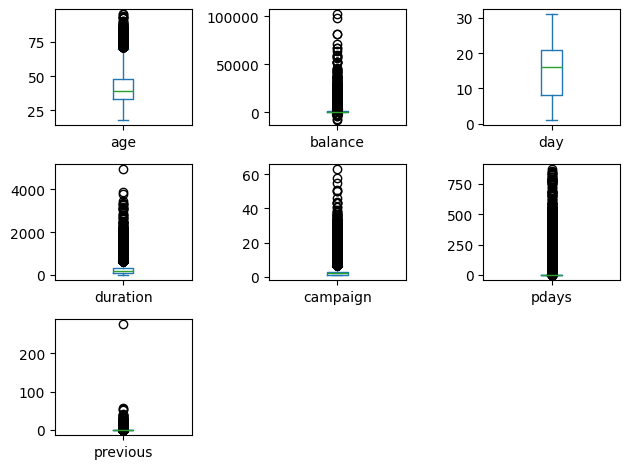

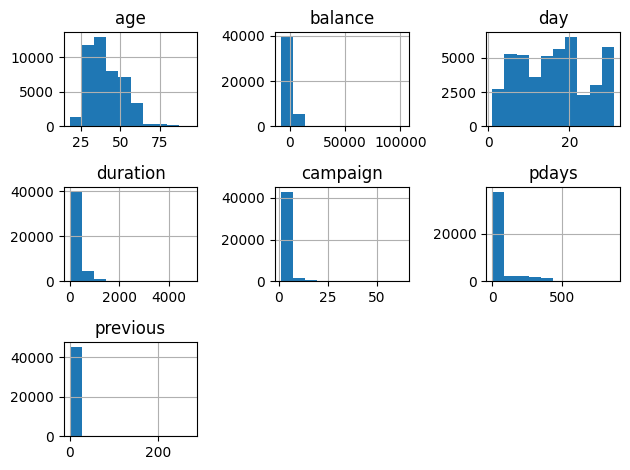

In [7]:
# Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)
from pandas.plotting import scatter_matrix

# Mostramos el diagrama de cajas y bigotes
df.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.tight_layout() 
plt.show()

# # Mostramos el historigrama
df.hist()  
plt.tight_layout() 
plt.show()